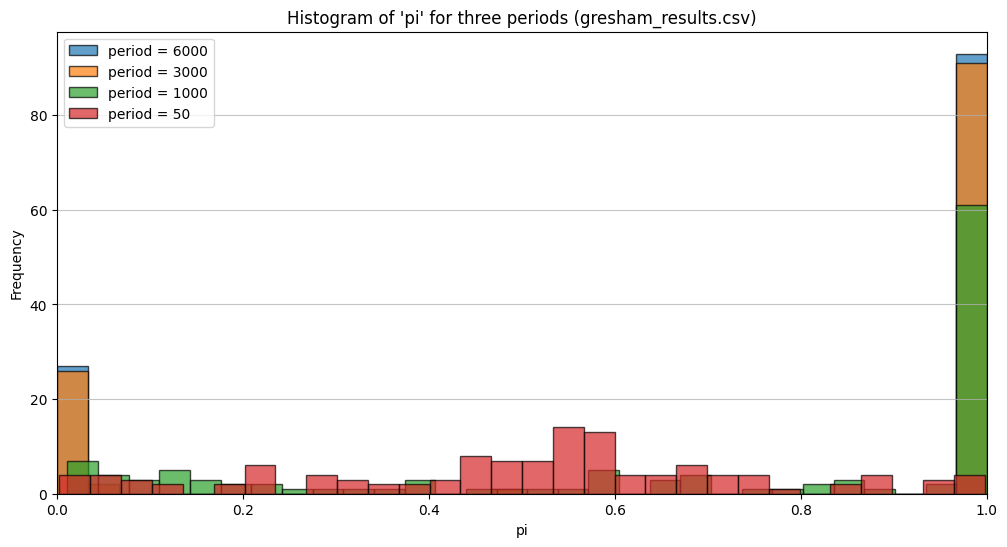

In [2]:
# Load the new CSV file
import pandas as pd
import matplotlib.pyplot as plt

# Load gresham_results.csv

gresham_df = pd.read_csv("gresham_results.csv")
periods_gresham = [6000, 3000, 1000, 50]
# Check required columns
required_columns = {"simulation", "period", "price", "pi", "beta0", "beta1"}
missing_columns = required_columns - set(gresham_df.columns)
if missing_columns:
    raise ValueError(f"Missing columns in gresham_results.csv: {missing_columns}")

# Filter the dataframe for the specified periods
gresham_data_by_period = {period: gresham_df[gresham_df["period"] == period]["pi"] for period in periods_gresham}

# Plot histograms for "pi" for the specified periods on the same plot
plt.figure(figsize=(12, 6))
for period, data in gresham_data_by_period.items():
    plt.hist(data, bins=30, alpha=0.7, label=f"period = {period}", edgecolor="black")

plt.title("Histogram of 'pi' for three periods (gresham_results.csv)")
plt.xlabel("pi")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.xlim(0, 1)
plt.show()

In [3]:
# Save the histogram as an image file
plt.figure(figsize=(12, 6))
for period, data in gresham_data_by_period.items():
    plt.hist(data, bins=30, alpha=0.7, label=f"time = {period}", edgecolor="black")

plt.title("Histogram of 'pi' for three periods (gresham_results.csv)")
plt.xlabel("pi")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.xlim(0, 1)

# Save the plot to a file
plt.savefig("histogram_pi_gresham.png", dpi=300, bbox_inches="tight")
plt.close()

In [4]:
# Filter the dataframe for period=6000
period_6000_data = gresham_df[gresham_df["period"] == 6000]

# Calculate the share of simulations where price=1
share_pi_1 = (period_6000_data["pi"] ==1).mean()

print(f"Share of simulations where price(6000) = 1: {share_pi_1:.2%}")

Share of simulations where price(6000) = 1: 76.67%


In [14]:
# Summary statistics for pi(6000)
summary_stats_pi_6000 = period_6000_data["pi"].describe()
rounded_stats_pi_6000 = summary_stats_pi_6000.round(5)
print("\nRounded summary statistics for pi(6000):")
print(rounded_stats_pi_6000)


Rounded summary statistics for pi(6000):
count    120.00000
mean       0.77509
std        0.41916
min        0.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: pi, dtype: float64


In [6]:
share_pi_less_than_0_2 = (period_6000_data["pi"] < 0.2).mean()
print(f"Share of pi(6000) < 0.2: {share_pi_less_than_0_2:.2%}")

Share of pi(6000) < 0.2: 22.50%


In [8]:
# Create and save the histogram of 'pi' for the last period (6000)
plt.figure(figsize=(12, 6))
plt.hist(period_6000_data["pi"], bins=30, alpha=0.7, edgecolor="black")
plt.title("Histogram of 'pi' for period = 6000")
plt.xlabel("pi")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.xlim(0, 1)
plt.savefig("gresham_pi_6000.png", dpi=300, bbox_inches="tight")
plt.close()

# Create and save the histogram of 'price' for the last period (6000)
plt.figure(figsize=(12, 6))
plt.hist(period_6000_data["price"], bins=30, alpha=0.7, edgecolor="black")
plt.title("Histogram of 'price' for period = 6000")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.savefig("gresham_price_6000.png", dpi=300, bbox_inches="tight")
plt.close()